##### Capstone Project 1
#Credit Card Approval Prediction

##Report:





This report presents the performance evaluation of four machine learning models for predicting credit card approval. The models considered are Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors (KNN).

##Model Evaluation Summary

###Logistic Regression
- Accuracy: 91%
- Precision for Class 1 (Rejected): 0%
- Recall for Class 1: 0%
- F1-Score for Class 1: 0%
**Interpretation**: While the model shows high accuracy for predicting approvals (Class 0), it struggles to predict rejections (Class 1), with both precision and recall for Class 1 being 0%.

###Decision Tree
- Accuracy: 88%
- Precision for Class 1 (Rejected): 1.25%
- Recall for Class 1: 1.5%
- F1-Score for Class 1: 8%
**Interpretation**: The Decision Tree model exhibits moderate accuracy but performs poorly in predicting rejections (Class 1), with low precision, recall, and F1-Score for Class 1.

###Random Forest
- Accuracy: 91%
- Precision for Class 1 (Rejected): 69%
- Recall for Class 1: 32%
- F1-Score for Class 1: 43%
**Interpretation**: The Random Forest model demonstrates good accuracy and improved performance in predicting rejections (Class 1) compared to the other models. However, there is still room for enhancement in recall and F1-Score for Class 1.

###K-Nearest Neighbors
- Accuracy: 85%
- Precision for Class 1 (Rejected): 25%
- Recall for Class 1: 22%
- F1-Score for Class 1: 23%
**Interpretation**: KNN model exhibits relatively lower accuracy and precision for predicting rejections (Class 1) compared to the other models, with moderate recall and F1-Score for Class 1.

##Recommendations and Conclusion:
- Oversampling techniques, such as Synthetic Minority Over-sampling Technique (SMOTE) or Random Oversampling, can be employed to address the imbalance in the dataset by generating synthetic examples of the minority class (Class 1, rejections).
- The Random Forest model performs relatively better than the other models in terms of overall accuracy and predicting rejections (Class 1).
- However, all models face challenges in effectively predicting rejections, with precision and recall for Class 1 being lower than desired.
- To improve credit card approval prediction, further model tuning, additional feature engineering, and oversampling techniques should be considered.


***It's essential to strike a balance between approving credit applications accurately and minimizing the risk of defaults. Further refinements to the models should focus on enhancing their ability to predict rejections while maintaining accuracy for approvals.***

#About the project:

Predicting good clients is **pivotal** in today's banking landscape, with a pronounced emphasis on **sustainability**. Such predictions enable banks to proactively manage **risks**, diminishing the chance of loan defaults and thereby fortifying their long-term **viability**. It offers a **competitive edge** as they can offer better terms and products, attracting and retaining customers. Moreover, adhering to **regulatory compliance** is crucial, reducing the risk of fines, ensuring **sustainable** operations. Improved **operational efficiency** not only cuts costs but ensures the bank's long-term **relevance** in a digitally transforming industry. These models, rooted in **sustainability**, underscore the significance of responsible lending, contributing to both financial stability and the broader economy's **sustainability**.

The knowledge gap in the banking sector in India is the limited adoption of advanced, data-driven credit approval systems. Many banks still rely on traditional, manual underwriting processes, which are time-consuming and less accurate. The proposed method can help bridge this gap by introducing a more sophisticated, data-driven approach to credit assessment.

Also incorporate external data sources in the dataset, such as credit scores from credit bureaus or economic indicators, to enhance credit assessment accuracy.



#Hypothesis:

**Hypothesis 1 - Model Selection**:
   - The machine learning model that combines predictive power and interpretability the best for this credit approval dataset is Decision Tree. We hypothesize that Decision Tree will perform competitively in terms of accuracy while providing transparency in credit approval decisions, making it a suitable choice for this context.

**Hypothesis 2 - Feature Importance**:
   - We hypothesize that the Random Forest model, known for its capability to assess feature importance effectively, will reveal that the "Credit Bureau Score" is the most critical feature in predicting credit approval outcomes. Additionally, we expect that "Annual Income" and "Type of Occupation" will be among the top features influencing credit approval decisions, indicating their significance in this dataset.


#Feature engineering techniques used

- **Encoding Categorical Variables:** Convert categorical features into numerical values using techniques like one-hot encoding or label encoding. This allows machine learning models to work with categorical data.
- **Feature Scaling:** Scale numerical features to ensure they have similar ranges. Common techniques include Min-Max scaling and Standardization (Z-score scaling).
- **Missing Value Handling:** Address missing data in the dataset, using techniques such as imputation (mean, median, mode), missing value indicators, or advanced methods like regression imputation.
- **Feature Selection:** Use techniques like recursive feature elimination, feature importance from tree-based models, or statistical tests to select the most relevant features for credit approval prediction.

#EDA

In [1]:
#Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
#csv
df = pd.read_csv('/content/Credit_card.csv')
df_label = pd.read_csv('/content/Credit_card_label.csv')

In [3]:
#shape
df.shape, df_label.shape

((1548, 18), (1548, 2))

In [4]:
#sample
df.sample(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
952,5090082,M,N,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15051.0,-1678,1,0,0,0,NaN,2
640,5050440,F,Y,Y,1,157500.0,Working,Incomplete higher,Civil marriage,House / apartment,-13046.0,-2753,1,0,0,0,NaN,3
1521,5079127,M,N,Y,0,270000.0,Working,Higher education,Married,House / apartment,-11944.0,-2262,1,0,0,0,Laborers,2
375,5086006,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497.0,365243,1,0,0,0,NaN,1
482,5038510,F,N,Y,0,103500.0,Working,Incomplete higher,Married,House / apartment,-11855.0,-4583,1,0,0,0,Laborers,2


In [5]:
#Information about the dataset

df.info()

#There are total 1548 rows and 18 columns. 8 columns data types are 'object' the rest are numerical.
#Some columns have missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
#Descriptive statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ind_ID,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
CHILDREN,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
Annual_income,1525.0,1.913993e+05,113252.997656,33750.0,121500.00,166500.0,225000.00,1575000.0
Birthday_count,1526.0,-1.604034e+04,4229.503202,-24946.0,-19553.00,-15661.5,-12417.00,-7705.0
Employed_days,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
Mobile_phone,1548.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
Work_Phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.00,1.0
Phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.00,1.0
EMAIL_ID,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.00,1.0
Family_Members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0


In [7]:
#drop column
df.drop(['Ind_ID'], axis=1, inplace=True)

In [8]:
#Change columns names to lower case.

df.columns = [col.lower() for col in df.columns]

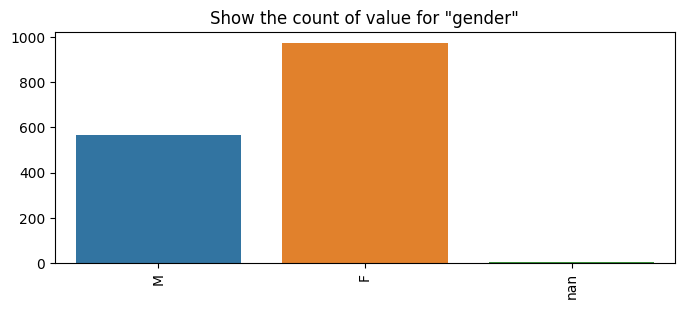

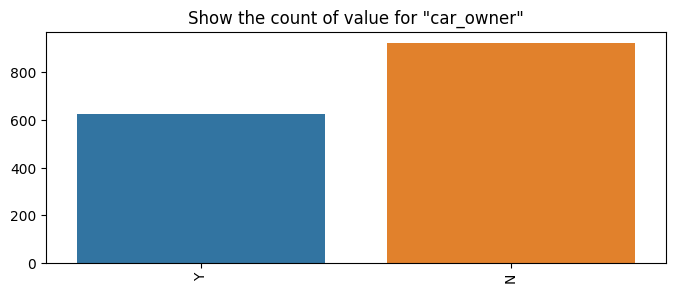

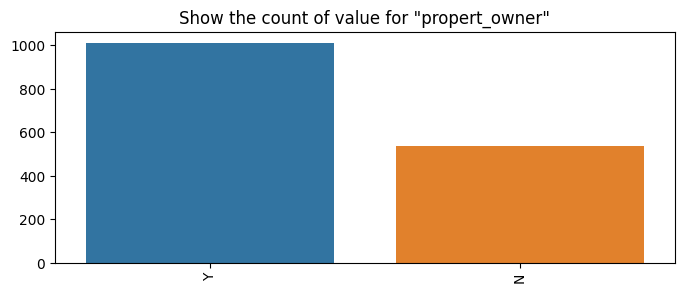

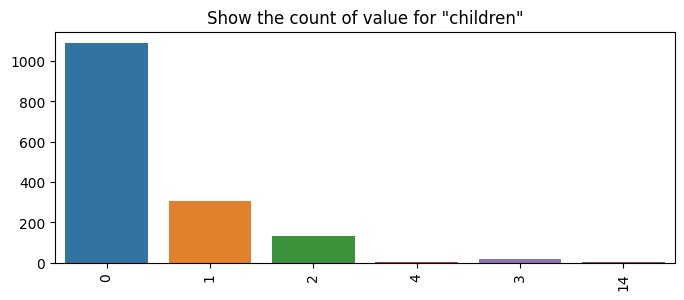

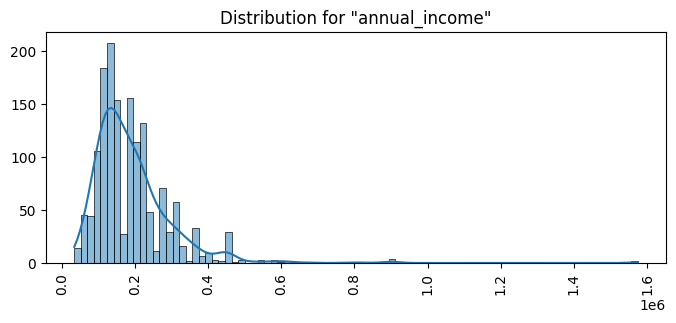

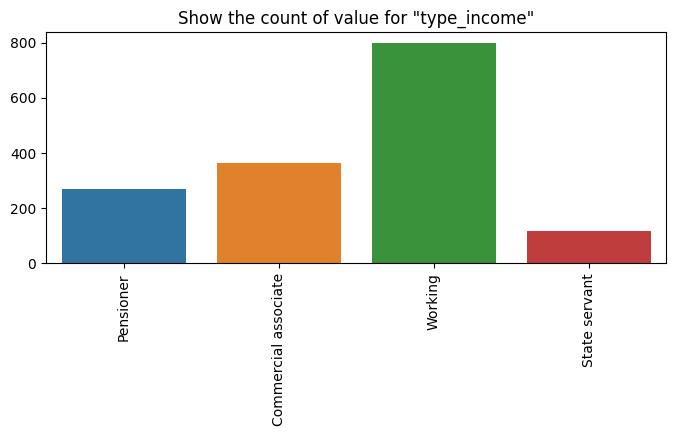

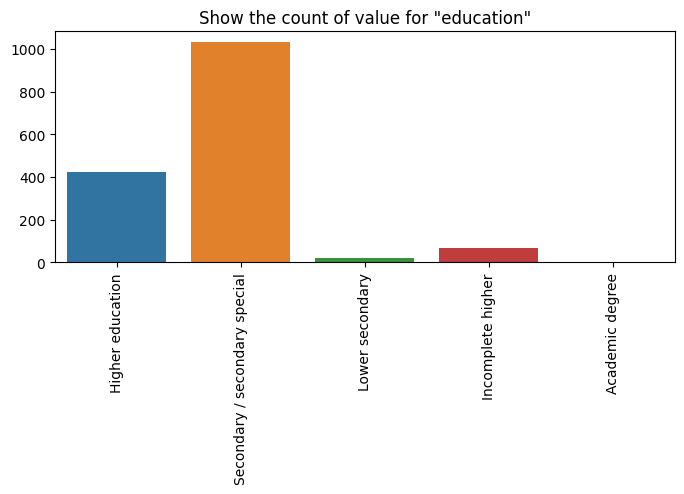

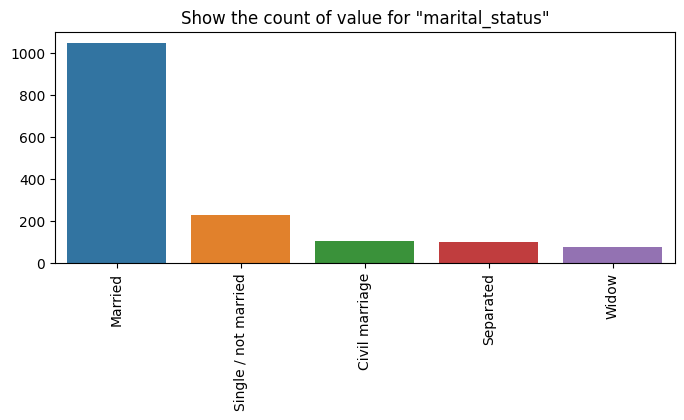

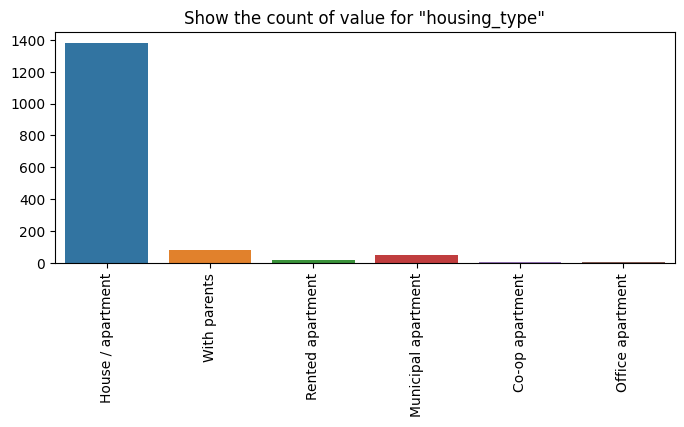

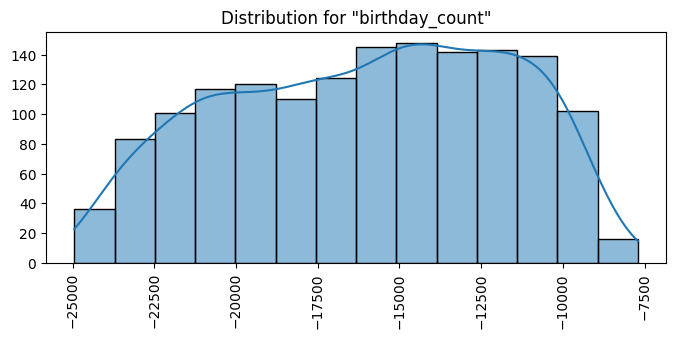

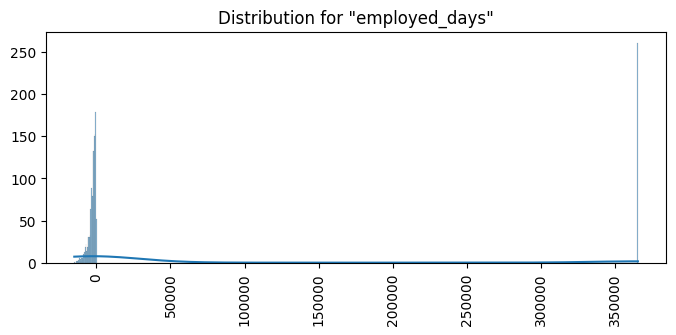

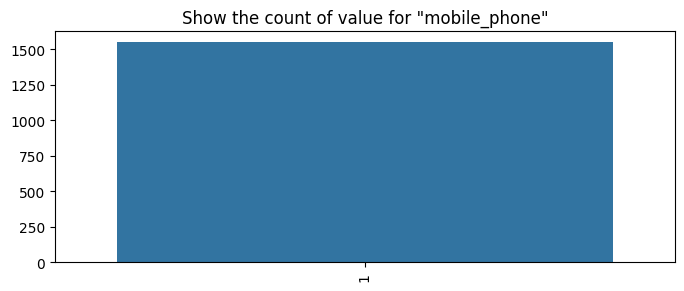

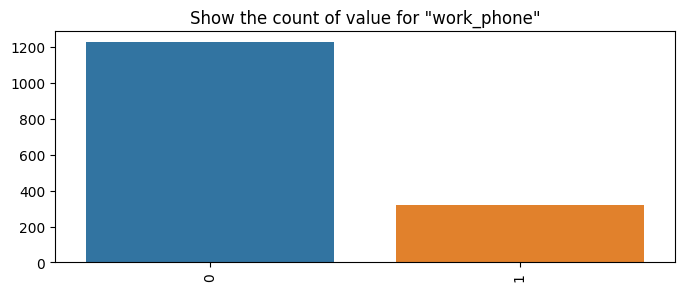

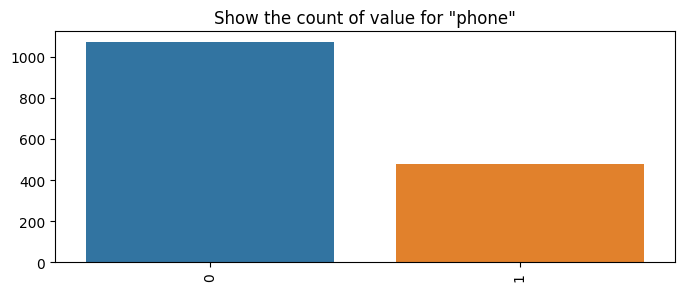

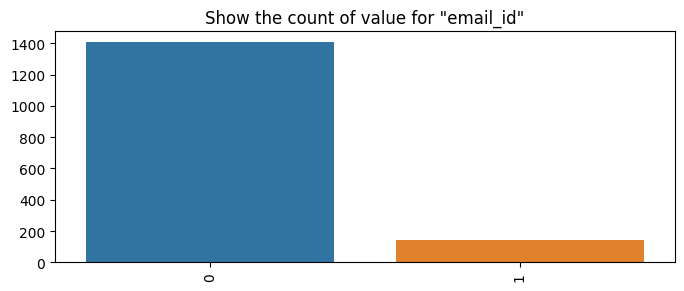

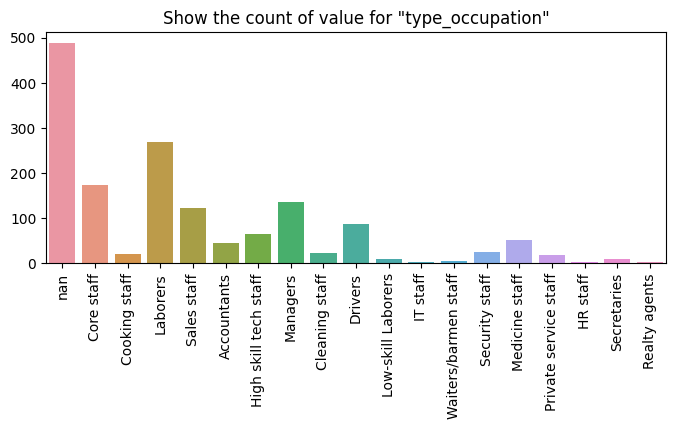

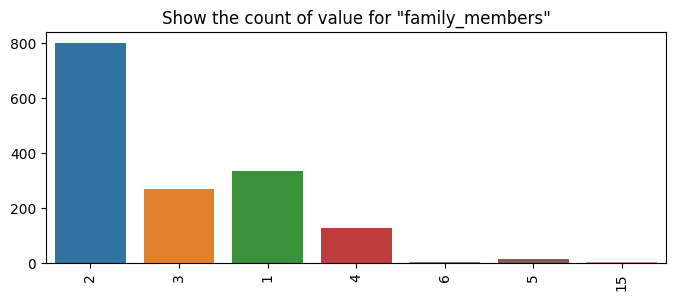

In [9]:
#visualizing the dataset with countplot and histplot also converting some of the columns to string

def plot_col(dataframe):
    for col in dataframe.columns:
        plt.figure(figsize=(8, 3))

        if dataframe[col].nunique() < 20:
            dataframe[col] = dataframe[col].astype('str')
            sns.countplot(data=dataframe, x=col);
            plt.xticks(rotation=90)
            plt.title(f'Show the count of value for "{col}"')
            plt.xlabel('')
            plt.ylabel('')
            plt.show()

        elif (dataframe[col].dtype == np.float64) or (dataframe[col].dtype == np.int64):
            sns.histplot(data=dataframe, x=col, kde=True);
            plt.title(f'Distribution for "{col}"')
            plt.xlabel('')
            plt.ylabel('')
            plt.xticks(rotation=90)
            plt.show()

plot_col(df)

**Information about the columns**
- Drop the 'mobile_phone' feature. Because all the values are 1.
- 'gender' and 'type_occupation' features have missing values.

In [10]:
#drop 'mobile_phone' feature

df.drop(['mobile_phone'], axis=1, inplace=True)

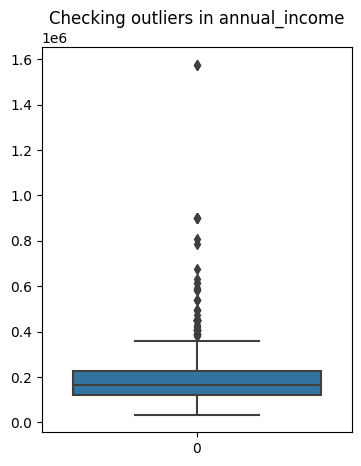

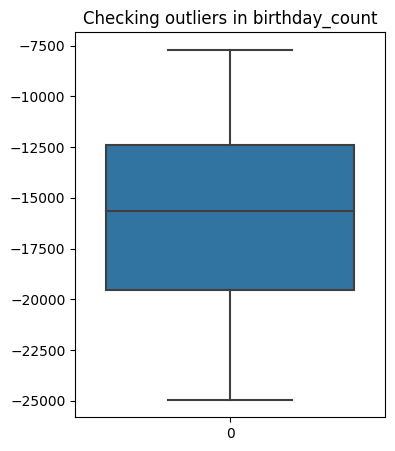

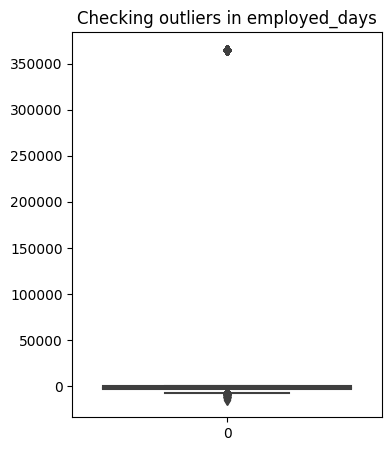

In [11]:
#Checking outliers

def checking_outliers(dataframe):
    for col in dataframe.columns:
        if dataframe[col].dtype == np.int64 or dataframe[col].dtype == np.float64:
            plt.figure(figsize=(4, 5));
            plt.title(f'Checking outliers in {col}');
            sns.boxplot(dataframe[col]);
            plt.show()


checking_outliers(df)

- It seems that 'birthday_count' column has no outliers. But other columns have outliers.

In [12]:
#removing outliers

def remove_outliers(dataframe, col='list'):
    for c in col:
        Q1 = dataframe[c].quantile(0.25)
        Q3 = dataframe[c].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - (1.5*IQR)
        upper_limit = Q3 + (1.5*IQR)

        dataframe.loc[dataframe[c] < lower_limit, c] = lower_limit
        dataframe.loc[dataframe[c] > upper_limit, c] = upper_limit

    return dataframe

df = remove_outliers(df, ['annual_income', 'employed_days'])

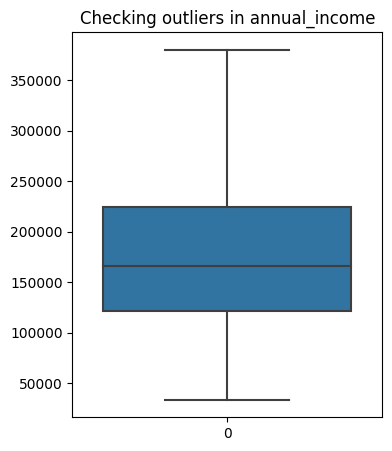

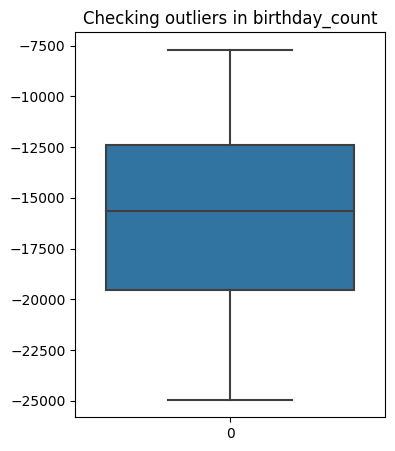

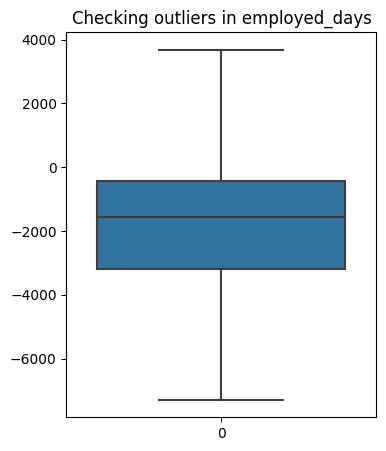

In [13]:
#checking outliers again

checking_outliers(df)

In [14]:
#checking null values

df.isnull().sum()

gender              0
car_owner           0
propert_owner       0
children            0
annual_income      23
type_income         0
education           0
marital_status      0
housing_type        0
birthday_count     22
employed_days       0
work_phone          0
phone               0
email_id            0
type_occupation     0
family_members      0
dtype: int64

In [15]:
#Fill missing values,
#Replace missing values with most frequent value in column 'gender'.
#Replace missing values with average value in columns 'annual_income' and 'birthday_count'.
#Replace missing values with 'unknown' in column 'type_occupation'.

df['gender'].fillna(df['gender'].mode().values[0], inplace=True)
df['gender'] = df['gender'].replace({'nan': df['gender'].mode().values[0]})
df['annual_income'].fillna(df['annual_income'].mean(), inplace=True)
df['birthday_count'].fillna(df['birthday_count'].mean(), inplace=True)
df['type_occupation'] = df['type_occupation'].replace({'nan':'unknown'})

In [16]:
#checking null values again

df.isnull().sum()

gender             0
car_owner          0
propert_owner      0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
birthday_count     0
employed_days      0
work_phone         0
phone              0
email_id           0
type_occupation    0
family_members     0
dtype: int64

In [19]:
#df['children'].value_counts(normalize=True)


#column modification: '0' signifies no children, '1' signifies 1 or more children.
df.loc[df['children'] != '0', 'children'] = '1'

In [25]:
#df['education'].value_counts(normalize=True)


#column modification: including lower contributing values into 'other'
df.loc[~((df['education'] == 'Secondary / secondary special') | (df['education'] == 'Higher education')), 'education'] = 'other'

In [24]:
#df['marital_status'].value_counts(normalize=True)


#column modification: 'Married', 'Single / not married' and 'other'
df.loc[~((df['marital_status'] == 'Married') | (df['marital_status'] == 'Single / not married')), 'marital_status'] = 'other'

In [27]:
#df['housing_type'].value_counts(normalize=True)


#column modification: 'House / apartment' and 'other'
df.loc[df['housing_type'] != 'House / apartment', 'housing_type'] = 'other'

In [29]:
#df['type_occupation'].value_counts(normalize=True)


#column modification: 'unknown', 'Laborers', 'Core staff' and 'other'
df.loc[~((df['type_occupation'] == 'unknown') | (df['type_occupation'] == 'Laborers') |
 (df['type_occupation'] == 'Core staff')), 'type_occupation'] = 'other'

In [31]:
#df['family_members'].value_counts(normalize=True)


#column modification: 1, 2, 3 and 'more'
df.loc[~((df['family_members'] == 1) | (df['family_members'] == 2) | (df['family_members'] == 3)), 'family_members'] = 'more'

In [32]:
#look at the dataset
df.sample(5)

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,type_occupation,family_members
878,M,N,Y,0,225000.0,Working,Secondary / secondary special,Married,House / apartment,-20298.0,-3282.0,0,0,0,other,more
1121,M,Y,Y,0,380250.0,Working,Higher education,Married,House / apartment,-19038.0,-73.0,0,1,0,unknown,more
89,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,other,-13720.0,-1394.0,0,0,0,Laborers,more
17,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,-18907.0,-2470.0,0,0,0,other,more
520,F,N,Y,0,67500.0,Working,Higher education,Married,House / apartment,-14240.0,-1586.0,0,0,0,Core staff,more


In [33]:
#Encoding.
#For columns which has 2 unique values we will use LabelEncoder from sklearn. The rest I will use pd.dummies (One hot encoding).

from sklearn.preprocessing import LabelEncoder


def encoding(dataframe):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'O' and dataframe[col].nunique() == 2:
            le = LabelEncoder()
            dataframe[col] = le.fit_transform(dataframe[col])

    return pd.get_dummies(dataframe, drop_first=True, dtype=np.int64)

df_encoded = encoding(df)

In [34]:
#looking at the dataset
df_encoded.sample(5)

,gender,car_owner,propert_owner,children,annual_income,housing_type,birthday_count,employed_days,work_phone,phone,...,type_income_Pensioner,type_income_State servant,type_income_Working,education_Secondary / secondary special,education_other,marital_status_Single / not married,marital_status_other,type_occupation_Laborers,type_occupation_other,type_occupation_unknown
524,0,0,1,0,112500.0,0,-9957.0,-1032.000,0,0,...,0,0,1,1,0,1,0,1,0,0
1473,1,0,1,0,114750.0,0,-21268.0,3682.375,0,0,...,1,0,0,1,0,0,1,0,0,1
994,0,0,1,0,189000.0,0,-20858.0,3682.375,0,0,...,1,0,0,1,0,0,1,0,0,1
797,0,0,1,0,157500.0,0,-22235.0,-7288.625,0,0,...,0,0,1,0,0,1,0,1,0,0
691,1,0,1,0,157500.0,0,-14023.0,-4280.000,1,0,...,0,0,1,0,0,0,0,1,0,0


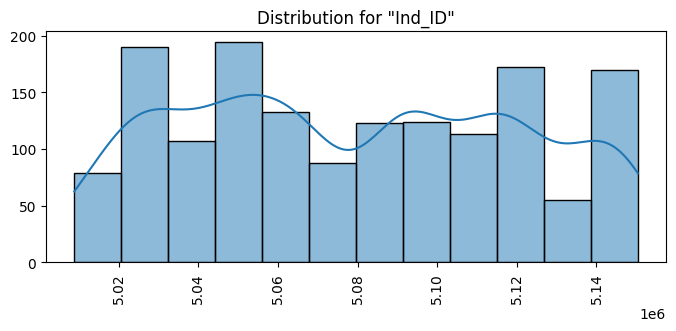

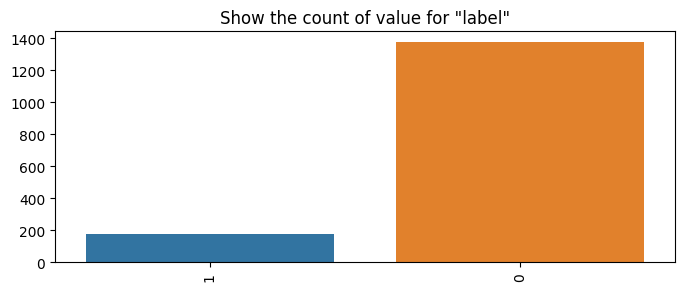

In [35]:
#visualizing the dependent dataset
plot_col(df_label)

- The target feature ('label') has imbalance problem.

In [36]:
#remove 'Ind_ID'
df_label.drop(['Ind_ID'], axis=1, inplace=True)

In [37]:
#changing dataframe name.

x = df_encoded
y = df_label

In [38]:
X_main = x.copy()
y_main = y.copy()

#K fold (Hypothesis 1)

In [39]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

X0 = X_main.copy()
y0 = y_main.copy()

# Load your dataset and split it into features (X) and target (y)

# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Initialize variables to store the results
best_model_name = None
best_model_score = 0

# Set up k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through the models and perform cross-validation
for model_name, model in models:
    scores = cross_val_score(model, X0, y0, cv=kfold, scoring='accuracy')
    mean_accuracy = scores.mean()

    if mean_accuracy > best_model_score:
        best_model_name = model_name
        best_model_score = mean_accuracy

    print(f'{model_name}: Mean Accuracy = {mean_accuracy:.2f}')

print(f'Best Model: {best_model_name} with Mean Accuracy = {best_model_score:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Logistic Regression: Mean Accuracy = 0.89
Decision Tree: Mean Accuracy = 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Random Forest: Mean Accuracy = 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

K-Nearest Neighbors: Mean Accuracy = 0.86
Best Model: Random Forest with Mean Accuracy = 0.92


K-Nearest Neighbors: Mean Accuracy = 0.86

Best Model: Random Forest with Mean Accuracy = 0.92

***Which means we can disaprove our hypothesis***

#Models with hyperparameter tuning

##logistic regression

In [47]:
#lets make dataframe for logistic regression

X1 = X_main.copy()
y1 = y_main.copy()

In [48]:
X1.shape, y1.shape

((1548, 21), (1548, 1))

In [49]:
y1 = y1.astype('int64')

In [50]:
#feature selection

import statsmodels.api as sm
logit_model=sm.Logit(y1, X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.343156
         Iterations 7
                                    Results: Logit
Model:                       Logit                   Method:                  MLE      
Dependent Variable:          label                   Pseudo R-squared:        0.027    
Date:                        2023-11-02 09:36        AIC:                     1104.4112
No. Observations:            1548                    BIC:                     1216.6503
Df Model:                    20                      Log-Likelihood:          -531.21  
Df Residuals:                1527                    LL-Null:                 -546.20  
Converged:                   1.0000                  LLR p-value:             0.069998 
No. Iterations:              7.0000                  Scale:                   1.0000   
---------------------------------------------------------------------------------------
                                         Coef.  Std.Err

In [52]:
#X1 = X1.drop(['car_owner'], axis=1)
#X1 = X1.drop(['propert_owner'], axis=1)
#X1 = X1.drop(['children'], axis=1)
#X1 = X1.drop(['marital_status_other'], axis=1)
#X1 = X1.drop(['marital_status_Single / not married'], axis=1)
#X1 = X1.drop(['education_other'], axis=1)
#X1 = X1.drop(['birthday_count', 'work_phone', 'phone', 'email_id'], axis=1)
#X1 = X1.drop(['type_income_Pensioner'], axis=1)
X1 = X1.drop(['housing_type'], axis=1)

In [53]:
### random state train test split will be same with all people using random_state=16
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [54]:
### both will have same shape
X_train.shape, y_train.shape

((1161, 9), (1161, 1))

In [55]:
### both will have same shape
X_test.shape, y_test.shape

((387, 9), (387, 1))

In [57]:
### Crating a standard scaler object
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler

StandardScaler()

In [58]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[ 1.32086368, -0.61547158, -0.143338  , ...,  2.23260746,
        -0.80134258, -0.69344599],
       [ 1.32086368, -0.61547158, -0.0462473 , ..., -0.44790677,
        -0.80134258, -0.69344599],
       [-0.7570804 , -0.88516056,  1.72046263, ..., -0.44790677,
        -0.80134258,  1.44207337],
       ...,
       [ 1.32086368, -0.88516056,  0.42391109, ...,  2.23260746,
        -0.80134258, -0.69344599],
       [-0.7570804 , -0.18396921, -0.78506762, ..., -0.44790677,
         1.24790573, -0.69344599],
       [-0.7570804 , -0.88516056,  0.3281504 , ...,  2.23260746,
        -0.80134258, -0.69344599]])

In [59]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[-0.7570804 , -1.15484954, -1.08997232, ..., -0.44790677,
         1.24790573, -0.69344599],
       [-0.7570804 , -1.39756962,  1.72046263, ..., -0.44790677,
        -0.80134258,  1.44207337],
       [-0.7570804 , -1.26272513, -0.27966398, ..., -0.44790677,
         1.24790573, -0.69344599],
       ...,
       [-0.7570804 , -0.72334717, -0.32521681, ..., -0.44790677,
         1.24790573, -0.69344599],
       [-0.7570804 , -0.18396921, -1.66121144, ..., -0.44790677,
         1.24790573, -0.69344599],
       [ 1.32086368,  0.46328435,  0.05649594, ..., -0.44790677,
         1.24790573, -0.69344599]])

In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
### Passing independant and dependant training data to the model
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
### prediction
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
## confusion matrix
from sklearn.metrics import confusion_matrix

confusion_mat=confusion_matrix(y_test, y_pred)
confusion_mat

array([[351,   0],
       [ 36,   0]])

In [65]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
clf = GridSearchCV(logreg, param_grid=parameter, scoring='accuracy', cv=5)
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [66]:
#best parameters
print(clf.best_params_)

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [67]:
#best score
print(clf.best_score_)

0.8802760100636376


In [68]:
#prediction
y_pred = clf.predict(X_test)

In [69]:
# accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.9069767441860465


In [70]:
### confusion matrix
cm1=confusion_matrix(y_test, y_pred)
cm1

array([[351,   0],
       [ 36,   0]])

In [72]:
#### classification report

from sklearn.metrics import classification_report
cr1 = classification_report(y_test, y_pred)
print(cr1)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       351
           1       0.00      0.00      0.00        36

    accuracy                           0.91       387
   macro avg       0.45      0.50      0.48       387
weighted avg       0.82      0.91      0.86       387



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Decision Tree

In [73]:
#lets make dataframe for Decision Tree

X2 = X_main.copy()
y2 = y_main.copy()

In [74]:
y2 = y2.astype('int64')

In [75]:
### random state train test split will be same with all people using random_state=16
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=16)

In [76]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [77]:
#preprunning
parameter = {'criterion': ['gini', 'entropy', 'log_loss'],
             'splitter': ['best', 'random'],
             'max_depth': [7, 8, 9, 11, 12],
             'max_features': ['auto', 'sqrt', 'log2']}

In [78]:
#fitting
clf = GridSearchCV(clf, param_grid=parameter, scoring='accuracy', cv=5)

In [79]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 8, 9, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [80]:
#best parameters
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [81]:
#best score
y_pred = clf.predict(X_test)

In [83]:
# accuracy
score = accuracy_score(y_test, y_pred)
score

0.8940568475452196

In [84]:
## confusion matrix
cm2=confusion_matrix(y_test, y_pred)
cm2

array([[344,   2],
       [ 39,   2]])

In [85]:
cr2 = classification_report(y_test, y_pred)
print(cr2)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       346
           1       0.50      0.05      0.09        41

    accuracy                           0.89       387
   macro avg       0.70      0.52      0.52       387
weighted avg       0.86      0.89      0.85       387



##Random Forest

In [86]:
#lets make dataframe for Random Forest

X3 = X_main.copy()
y3 = y_main.copy()

In [87]:
# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test= train_test_split(X3, y3, test_size= 0.25, random_state=16)

In [88]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [90]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [91]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [7, 8, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [92]:
#convert y_train to 1d array
y_train = y_train.values.ravel()
y_train.shape

(1161,)

In [93]:
#fitting
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [7, 8, 12],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [94]:
#best parameters
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [95]:
#best score
grid_search.best_score_

0.9199015835429926

In [96]:
#convert y_test to 1d array
y_test = y_test.values.ravel()
y_test.shape

(387,)

In [97]:
# predicting the test set result
y_pred = grid_search.predict(x_test)

In [98]:
print(y_pred)

['1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0

In [99]:
#score
grid_search.score(x_test, y_test)

0.9069767441860465

In [100]:
#confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[341,   5],
       [ 31,  10]])

In [101]:
#classification report
cr3 = classification_report(y_test, y_pred)
print(cr3)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       346
           1       0.67      0.24      0.36        41

    accuracy                           0.91       387
   macro avg       0.79      0.61      0.65       387
weighted avg       0.89      0.91      0.89       387



##KNN

In [102]:
#lets make dataframe for KNN

X4 = X_main.copy()
y4 = y_main.copy()

In [103]:
# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test= train_test_split(X4, y4, test_size= 0.25, random_state=16)

In [104]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [105]:
#import knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [106]:
#fitting
knn.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [107]:
#predicting the test set result
y_pred = knn.predict(x_test)

In [108]:
#score
knn.score(x_test, y_test)

0.8475452196382429

In [109]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[319,  27],
       [ 32,   9]])

In [110]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       346
           1       0.25      0.22      0.23        41

    accuracy                           0.85       387
   macro avg       0.58      0.57      0.57       387
weighted avg       0.84      0.85      0.84       387



In [111]:
#Error rate

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test)
    error_rate.append(1 - accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

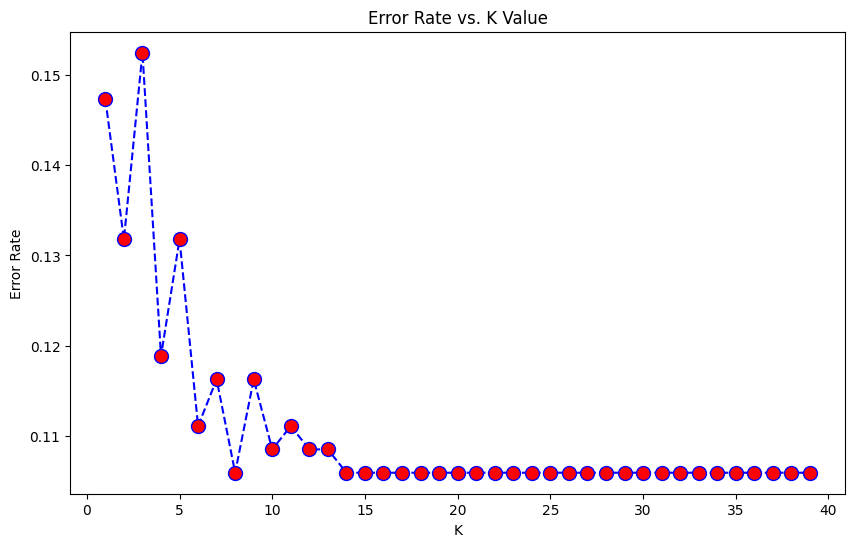

In [112]:
#plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [113]:
#wth kvalue=14
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [114]:
#score
knn.score(x_test, y_test)

0.8940568475452196

In [115]:
#confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
cm4

array([[319,  27],
       [ 32,   9]])

In [116]:
#classification report
cr4 = classification_report(y_test, y_pred)
print(cr4)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       346
           1       0.25      0.22      0.23        41

    accuracy                           0.85       387
   macro avg       0.58      0.57      0.57       387
weighted avg       0.84      0.85      0.84       387



#Result

In [117]:
# Print and display confusion matrices
print("Confusion Matrix for logistic regression:")
print(cm1)

print("\nConfusion Matrix for Decision tree:")
print(cm2)

print("\nConfusion Matrix for Random Forest:")
print(cm3)

print("\nConfusion Matrix for KNN:")
print(cm4)

Confusion Matrix for logistic regression:
[[351   0]
 [ 36   0]]

Confusion Matrix for Decision tree:
[[344   2]
 [ 39   2]]

Confusion Matrix for Random Forest:
[[341   5]
 [ 31  10]]

Confusion Matrix for KNN:
[[319  27]
 [ 32   9]]


In [118]:
# Show overall results
print("Summary of logistic regression:")
print(cr1)


print("\n\n\nSummary of Decision tree:")
print(cr2)

print("\n\n\nSummary of Random Forest:")
print(cr3)

print("\n\n\nSummary of KNN:")
print(cr4)

Summary of logistic regression:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       351
           1       0.00      0.00      0.00        36

    accuracy                           0.91       387
   macro avg       0.45      0.50      0.48       387
weighted avg       0.82      0.91      0.86       387




Summary of Decision tree:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       346
           1       0.50      0.05      0.09        41

    accuracy                           0.89       387
   macro avg       0.70      0.52      0.52       387
weighted avg       0.86      0.89      0.85       387




Summary of Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       346
           1       0.67      0.24      0.36        41

    accuracy                           0.91       387
   macro avg       0.79      0.61     

#SQL Part

In [121]:
#make dataframe for SQL
#csv
x5 = pd.read_csv('/content/Credit_card.csv')
y5 = pd.read_csv('/content/Credit_card_label.csv')

In [122]:
#drop column
x5.drop(['Ind_ID'], axis=1, inplace=True)
y5.drop(['Ind_ID'], axis=1, inplace=True)

In [123]:
#concat both dataframes
X5 = pd.concat([x5, y5], axis=1)

In [129]:
#Change columns names to lower case.

X5.columns = [col.lower() for col in X5.columns]

In [156]:
#sample
X5.sample(5)

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
129,F,N,N,0,81000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-23902.0,3682.375,1,0,1,0,NaN,1,1
503,F,N,N,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,NaN,-2052.000,1,0,1,0,Laborers,2,0
467,F,N,N,0,180000.0,Commercial associate,Incomplete higher,Married,With parents,-8247.0,-430.000,1,1,0,1,Sales staff,2,0
623,M,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-19511.0,-3503.000,1,0,0,0,Drivers,2,0
489,M,N,Y,0,162000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11495.0,-581.000,1,0,0,0,Security staff,1,0


In [131]:
#removing outliers
X5 = remove_outliers(X5, ['annual_income', 'employed_days'])

In [132]:
#Fill missing values,

df['gender'].fillna(df['gender'].mode().values[0], inplace=True)
df['gender'] = df['gender'].replace({'nan': df['gender'].mode().values[0]})
df['annual_income'].fillna(df['annual_income'].mean(), inplace=True)
df['birthday_count'].fillna(df['birthday_count'].mean(), inplace=True)
df['type_occupation'] = df['type_occupation'].replace({'nan':'unknown'})

In [133]:
#impoerting library for SQL
import duckdb

In [134]:
c = duckdb.connect()
c.register("X5", X5)

In [158]:
#Group the customers based on their income type and find the average of their annual income.

c.execute("SELECT type_income, AVG(annual_income) AS avg_annual_income FROM X5 GROUP BY type_income").fetch_df()

,type_income,avg_annual_income
0,Pensioner,151761.888679
1,Commercial associate,215175.630252
2,Working,178804.475222
3,State servant,202655.172414


In [169]:
#Find the female owners of cars and property.

c.execute("SELECT * FROM X5 WHERE gender = 'F' AND car_Owner = 'Y' AND propert_owner = 'Y'").fetch_df()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002.000,1,1,1,0,Cooking staff,2,1
1,F,Y,Y,0,NaN,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002.000,1,1,1,0,Cooking staff,2,1
2,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002.000,1,1,1,0,Cooking staff,2,1
3,F,Y,Y,0,380250.0,Commercial associate,Higher education,Married,House / apartment,-15702.0,-185.000,1,0,1,0,NaN,2,1
4,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23835.0,3682.375,1,0,0,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,F,Y,Y,1,126000.0,Working,Higher education,Married,House / apartment,-9441.0,-157.000,1,0,0,0,NaN,3,0
173,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,-22077.0,3682.375,1,0,1,0,NaN,2,0
174,F,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12559.0,-5862.000,1,0,1,0,Medicine staff,5,0
175,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,-12903.0,-2924.000,1,0,0,0,Accountants,3,0


In [170]:
#Find the male customers who are staying with their families.

c.execute("SELECT * FROM X5 WHERE gender = 'M' AND housing_type = 'With parents'").fetch_df()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,M,N,N,1,380250.0,Pensioner,Higher education,Married,With parents,-8907.0,-913.000,1,0,0,1,NaN,3,1
1,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,-13720.0,-1394.000,1,0,0,0,Laborers,2,1
2,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,-13720.0,-1394.000,1,0,0,0,Laborers,2,1
3,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,-13720.0,-1394.000,1,0,0,0,Laborers,2,1
4,M,Y,N,0,180000.0,Working,Secondary / secondary special,Single / not married,With parents,-8528.0,-531.000,1,0,0,0,NaN,1,0
5,M,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,With parents,-11344.0,-3309.000,1,0,0,0,Core staff,1,0
6,M,N,N,0,270000.0,Working,Secondary / secondary special,Married,With parents,-11768.0,-622.000,1,1,1,0,Laborers,2,0
7,M,Y,Y,0,153000.0,Working,Higher education,Separated,With parents,-20013.0,-7288.625,1,0,0,1,Managers,1,0
8,M,Y,N,0,157500.0,Working,Incomplete higher,Married,With parents,-9124.0,-960.000,1,1,0,0,Drivers,2,0
9,M,Y,Y,2,157500.0,Commercial associate,Higher education,Married,With parents,-14192.0,-626.000,1,0,0,0,Drivers,4,0


In [159]:
#list the top five people having the highest income

c.execute("SELECT * FROM X5 ORDER BY annual_income DESC LIMIT 5").fetch_df()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678.0,1,0,1,1,Core staff,3,1
1,M,Y,Y,1,380250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678.0,1,0,1,1,Core staff,3,1
2,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678.0,1,0,1,1,Core staff,1,1
3,M,N,N,1,380250.0,Pensioner,Higher education,Married,With parents,-8907.0,-913.0,1,0,0,1,NaN,3,1
4,F,Y,Y,0,380250.0,Commercial associate,Higher education,Married,House / apartment,-15702.0,-185.0,1,0,1,0,NaN,2,1


In [162]:
#How many married people are having bad credit?

c.execute("SELECT * FROM X5 WHERE marital_status = 'Married' AND label = 1").fetch_df()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,3682.375,1,0,0,0,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586.000,1,1,1,0,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586.000,1,1,1,0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586.000,1,1,1,0,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586.000,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,M,Y,N,1,380250.0,Working,Higher education,Married,House / apartment,-9847.0,-502.000,1,0,1,1,Core staff,3,1
110,NaN,Y,N,1,380250.0,Working,Higher education,Married,House / apartment,-9847.0,-502.000,1,0,1,1,Core staff,3,1
111,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348.0,-2420.000,1,0,0,0,Managers,2,1
112,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387.0,-1325.000,1,0,1,1,Medicine staff,2,1


In [166]:
#What is the highest education level and what is the total count?

c.execute("SELECT education, COUNT(*) FROM X5 WHERE education = 'Academic degree' GROUP BY education").fetch_df()

,education,count_star()
0,Academic degree,2


In [168]:
#Between married males and females, who is having more bad credit?

c.execute("SELECT gender, COUNT(*) AS bad_credit_count FROM X5 WHERE marital_status = 'Married' AND label = 1 GROUP BY gender ORDER BY bad_credit_count DESC").fetch_df()

,gender,bad_credit_count
0,F,59
1,M,51
2,NaN,4
